In [82]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.losses import Huber
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import numpy as np
import warnings
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
data = pd.read_excel('hourly-dataset_final.xlsx')

data.head()

,Date,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,(Inverter)
0,2016-01-31,24,0.0,5.00,1.40,0.89,95.56,9.00,29.10,29.89,0.0,NaN
1,2016-02-01,1,0.0,7.88,1.16,0.62,91.04,7.04,29.11,29.90,0.0,NaN
2,2016-02-01,2,0.0,9.84,1.22,0.96,89.28,8.96,29.12,29.91,0.0,NaN
3,2016-02-01,3,0.0,9.84,1.02,0.61,89.12,6.36,29.14,29.93,0.0,NaN
4,2016-02-01,4,0.0,9.88,0.83,0.45,90.08,6.12,29.15,29.94,0.0,NaN


In [4]:
data.drop(['Date', '(Inverter)'], axis=1, inplace=True)

In [83]:
temp = data[(data['Hour'] <= 18) & (data['Hour'] >=5)]

y = temp['Solar energy']
x = temp.drop('Solar energy', axis=1)

### Feature Scaling

In [84]:
scaler = MinMaxScaler()

columns = list(x.columns)
scaled_x = pd.DataFrame(scaler.fit_transform(x), columns=columns)

In [86]:
train_X, test_X, train_y, test_y = train_test_split(scaled_x, y, test_size = 0.30)

train_X = np.asarray(train_X).astype('float32')
test_X = np.asarray(test_X).astype('float32')
train_y = np.asarray(train_y).astype('float32')
test_y = np.asarray(test_y).astype('float32')

### Model training

In [96]:
NN_model = Sequential()


NN_model.add(Dense(512, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

loss = Huber(delta=600, name="huber_loss")
NN_model.compile(loss=loss, optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

early_stopping = EarlyStopping(monitor='val_mean_absolute_error', mode='min', verbose=1, patience=50)
callbacks_list = [early_stopping]

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 512)               5120      
_________________________________________________________________
dense_61 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 257       
Total params: 136,705
Trainable params: 136,705
Non-trainable params: 0
_________________________________________________________________


In [97]:
history = NN_model.fit(train_X, train_y, epochs=500, batch_size=64, validation_split = 0.20, callbacks=callbacks_list)

Epoch 1/500
77/77 [==============================] - 1s 6ms/step - loss: 793721.0681 - mean_absolute_error: 1547.9094 - val_loss: 659818.0000 - val_mean_absolute_error: 1351.1757
Epoch 2/500
77/77 [==============================] - 0s 3ms/step - loss: 601855.0136 - mean_absolute_error: 1270.6849 - val_loss: 570202.6875 - val_mean_absolute_error: 1226.1185
Epoch 3/500
77/77 [==============================] - 0s 3ms/step - loss: 578043.5248 - mean_absolute_error: 1238.7431 - val_loss: 545953.0625 - val_mean_absolute_error: 1187.0288
Epoch 4/500
77/77 [==============================] - 0s 2ms/step - loss: 548907.2047 - mean_absolute_error: 1191.0664 - val_loss: 515850.6562 - val_mean_absolute_error: 1133.5081
Epoch 5/500
77/77 [==============================] - 0s 3ms/step - loss: 523768.3237 - mean_absolute_error: 1146.2203 - val_loss: 482451.5625 - val_mean_absolute_error: 1072.6051
Epoch 6/500
77/77 [==============================] - 0s 2ms/step - loss: 489763.2676 - mean_absolute_erro

Epoch 47/500
77/77 [==============================] - 0s 2ms/step - loss: 208710.8197 - mean_absolute_error: 556.7510 - val_loss: 212253.0469 - val_mean_absolute_error: 561.3513
Epoch 48/500
77/77 [==============================] - 0s 2ms/step - loss: 203697.6214 - mean_absolute_error: 545.9368 - val_loss: 209278.2656 - val_mean_absolute_error: 555.8301
Epoch 49/500
77/77 [==============================] - 0s 2ms/step - loss: 203296.1581 - mean_absolute_error: 543.9141 - val_loss: 206217.6250 - val_mean_absolute_error: 551.1721
Epoch 50/500
77/77 [==============================] - 0s 2ms/step - loss: 202519.8648 - mean_absolute_error: 546.3329 - val_loss: 202842.1875 - val_mean_absolute_error: 543.8242
Epoch 51/500
77/77 [==============================] - 0s 2ms/step - loss: 202958.8906 - mean_absolute_error: 544.3120 - val_loss: 200810.1250 - val_mean_absolute_error: 539.4776
Epoch 52/500
77/77 [==============================] - 0s 2ms/step - loss: 192126.7738 - mean_absolute_error: 5

77/77 [==============================] - 0s 2ms/step - loss: 154507.7383 - mean_absolute_error: 449.2114 - val_loss: 166291.0781 - val_mean_absolute_error: 473.2886
Epoch 94/500
77/77 [==============================] - 0s 2ms/step - loss: 162297.6534 - mean_absolute_error: 464.4723 - val_loss: 166646.6562 - val_mean_absolute_error: 470.9296
Epoch 95/500
77/77 [==============================] - 0s 2ms/step - loss: 162909.9617 - mean_absolute_error: 463.2799 - val_loss: 167994.2812 - val_mean_absolute_error: 476.3983
Epoch 96/500
77/77 [==============================] - 0s 3ms/step - loss: 162156.3249 - mean_absolute_error: 465.0997 - val_loss: 171012.2188 - val_mean_absolute_error: 484.2740
Epoch 97/500
77/77 [==============================] - 0s 3ms/step - loss: 165645.4714 - mean_absolute_error: 470.2628 - val_loss: 165850.8594 - val_mean_absolute_error: 469.5383
Epoch 98/500
77/77 [==============================] - 0s 2ms/step - loss: 163655.9468 - mean_absolute_error: 465.2621 - val

Epoch 139/500
77/77 [==============================] - 0s 2ms/step - loss: 152444.0595 - mean_absolute_error: 443.1093 - val_loss: 162948.8438 - val_mean_absolute_error: 459.9585
Epoch 140/500
77/77 [==============================] - 0s 2ms/step - loss: 164755.9397 - mean_absolute_error: 466.0032 - val_loss: 161726.2500 - val_mean_absolute_error: 461.7535
Epoch 141/500
77/77 [==============================] - 0s 2ms/step - loss: 164562.3047 - mean_absolute_error: 465.5973 - val_loss: 161385.7969 - val_mean_absolute_error: 460.4301
Epoch 142/500
77/77 [==============================] - 0s 2ms/step - loss: 163109.7007 - mean_absolute_error: 460.6415 - val_loss: 163095.2656 - val_mean_absolute_error: 459.1760
Epoch 143/500
77/77 [==============================] - 0s 2ms/step - loss: 160139.6356 - mean_absolute_error: 456.0954 - val_loss: 161857.3281 - val_mean_absolute_error: 461.9351
Epoch 144/500
77/77 [==============================] - 0s 2ms/step - loss: 153791.7846 - mean_absolute_er

Epoch 230/500
77/77 [==============================] - 0s 2ms/step - loss: 157615.8646 - mean_absolute_error: 448.7171 - val_loss: 159200.7500 - val_mean_absolute_error: 452.9871
Epoch 231/500
77/77 [==============================] - 0s 2ms/step - loss: 157378.6108 - mean_absolute_error: 451.3112 - val_loss: 159183.7656 - val_mean_absolute_error: 455.5793
Epoch 232/500
77/77 [==============================] - 0s 2ms/step - loss: 158070.0132 - mean_absolute_error: 453.1046 - val_loss: 159273.7500 - val_mean_absolute_error: 452.2982
Epoch 233/500
77/77 [==============================] - 0s 2ms/step - loss: 159416.1590 - mean_absolute_error: 450.1479 - val_loss: 160674.2031 - val_mean_absolute_error: 457.6943
Epoch 234/500
77/77 [==============================] - 0s 3ms/step - loss: 158004.2927 - mean_absolute_error: 449.9834 - val_loss: 159184.2031 - val_mean_absolute_error: 451.1049
Epoch 235/500
77/77 [==============================] - 0s 2ms/step - loss: 157124.6078 - mean_absolute_er

Epoch 276/500
77/77 [==============================] - 0s 2ms/step - loss: 156609.2388 - mean_absolute_error: 447.2037 - val_loss: 158133.2188 - val_mean_absolute_error: 449.1664
Epoch 277/500
77/77 [==============================] - 0s 2ms/step - loss: 151699.1548 - mean_absolute_error: 436.3516 - val_loss: 160968.2344 - val_mean_absolute_error: 458.7693
Epoch 278/500
77/77 [==============================] - 0s 2ms/step - loss: 160215.1859 - mean_absolute_error: 455.0094 - val_loss: 158756.7500 - val_mean_absolute_error: 452.7715
Epoch 279/500
77/77 [==============================] - 0s 2ms/step - loss: 148449.4579 - mean_absolute_error: 430.3150 - val_loss: 159788.4844 - val_mean_absolute_error: 452.6415
Epoch 280/500
77/77 [==============================] - 0s 2ms/step - loss: 150762.8513 - mean_absolute_error: 435.5784 - val_loss: 159406.2344 - val_mean_absolute_error: 448.6178
Epoch 281/500
77/77 [==============================] - 0s 2ms/step - loss: 156105.0222 - mean_absolute_er

Epoch 322/500
77/77 [==============================] - 0s 3ms/step - loss: 152899.9129 - mean_absolute_error: 437.7959 - val_loss: 158039.1875 - val_mean_absolute_error: 451.5229
Epoch 323/500
77/77 [==============================] - 0s 3ms/step - loss: 155785.5058 - mean_absolute_error: 444.5141 - val_loss: 159768.1875 - val_mean_absolute_error: 448.8752
Epoch 324/500
77/77 [==============================] - 0s 3ms/step - loss: 154795.6312 - mean_absolute_error: 442.1017 - val_loss: 158823.1406 - val_mean_absolute_error: 448.6623
Epoch 325/500
77/77 [==============================] - 0s 3ms/step - loss: 153104.7003 - mean_absolute_error: 437.7122 - val_loss: 158245.0000 - val_mean_absolute_error: 452.1881
Epoch 326/500
77/77 [==============================] - 0s 3ms/step - loss: 148321.0653 - mean_absolute_error: 433.1092 - val_loss: 157365.2500 - val_mean_absolute_error: 445.8333
Epoch 327/500
77/77 [==============================] - 0s 3ms/step - loss: 152741.6360 - mean_absolute_er

Epoch 368/500
77/77 [==============================] - 0s 2ms/step - loss: 154315.8878 - mean_absolute_error: 441.1386 - val_loss: 158788.7344 - val_mean_absolute_error: 447.3951
Epoch 369/500
77/77 [==============================] - 0s 3ms/step - loss: 154578.7722 - mean_absolute_error: 440.8342 - val_loss: 158300.2656 - val_mean_absolute_error: 453.8951
Epoch 370/500
77/77 [==============================] - 0s 3ms/step - loss: 153051.0357 - mean_absolute_error: 439.0469 - val_loss: 156930.6875 - val_mean_absolute_error: 447.7455
Epoch 371/500
77/77 [==============================] - 0s 3ms/step - loss: 151367.4249 - mean_absolute_error: 437.1914 - val_loss: 156731.5469 - val_mean_absolute_error: 445.3308
Epoch 372/500
77/77 [==============================] - 0s 3ms/step - loss: 154050.0586 - mean_absolute_error: 440.9619 - val_loss: 158164.9062 - val_mean_absolute_error: 450.8657
Epoch 373/500
77/77 [==============================] - 0s 3ms/step - loss: 151986.6713 - mean_absolute_er

Epoch 459/500
77/77 [==============================] - 0s 3ms/step - loss: 149136.5050 - mean_absolute_error: 429.8387 - val_loss: 156917.5312 - val_mean_absolute_error: 443.0196
Epoch 460/500
77/77 [==============================] - 0s 3ms/step - loss: 144590.1216 - mean_absolute_error: 423.7099 - val_loss: 156769.5000 - val_mean_absolute_error: 442.7234
Epoch 461/500
77/77 [==============================] - 0s 3ms/step - loss: 157100.1971 - mean_absolute_error: 443.2570 - val_loss: 156044.8125 - val_mean_absolute_error: 443.4146
Epoch 462/500
77/77 [==============================] - 0s 3ms/step - loss: 144813.0353 - mean_absolute_error: 420.9997 - val_loss: 157142.5625 - val_mean_absolute_error: 444.1216
Epoch 463/500
77/77 [==============================] - 0s 3ms/step - loss: 142163.2728 - mean_absolute_error: 415.4332 - val_loss: 155751.1094 - val_mean_absolute_error: 443.5713
Epoch 464/500
77/77 [==============================] - 0s 3ms/step - loss: 153502.5791 - mean_absolute_er

In [99]:
preds = NN_model.predict(test_X)
r2 = r2_score(test_y, preds)
print("R2 : % f" %(r2))

R2 :  0.782694


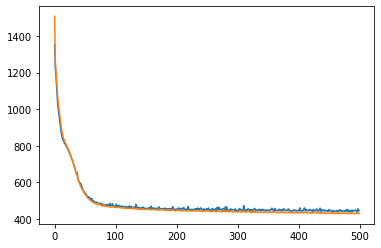

In [98]:
epoch = [i for i in range(500)]
sns.lineplot(epoch, history.history['val_mean_absolute_error'])
sns.lineplot(epoch, history.history['mean_absolute_error'])